In [ ]:
# Deep learning (신경망)


In [ ]:
 #conda install tensorflow=1.14.0
 #conda create --name tf_test python anaconda
 #activate tf_test  / 입장
 #conda update conda  /
 #conda update pip 
 #jupyter kernel install 
 
 # 이건 가상환경 구성

In [ ]:
# Cuda

Constant 상수
Variables 변수(가중치)
placeholder 주입변수 (미니배치만큼 넘겨줌)
session = GPU에 준다는것


fitting은 for문으로 진행~
미니배치사이즈로 데이터를 만듦
신경망은 데이터가 많아야함.

신경망의 자료구조는 Graph

동그라미는 node 다리는 edge
edge는 tensor가 처리함.
그리고 분산처리가 가능함.
분산처리는 동기화가 제일 중요함.

In [2]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages

1.14.0


C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_t

In [5]:
# 데이터 타입
hello = tf.constant('Hello tensorFlow!')
sess = tf.Session()
print(sess.run(hello))#tensorflow의 데이터는 직접 확인이 불가함
print(hello) # numpy 데이터로 변경


b'Hello tensorFlow!'
Tensor("Const_3:0", shape=(), dtype=string)


In [6]:
x = tf.constant(35,name='x') 
# model의 그라프 구조확인
# model을 그대로 저장할때( 가중치 ) 메모리 위치를 확인하기 위해서
y = tf.Variable(x + 5, name='y') # 변수가 있는경우 - 반드시 초기화해줘야함.

print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [9]:
# variables 를 호출할때는 불러야함 
model = tf.global_variables_initializer() # 변수 초기화

# 학습 시키는과정
with tf.Session() as sess:
    sess.run(model)
    print(sess.run(y))

40


In [10]:
# 판다스에서 데이터 초기화 (list , dict)
# 요소끼리 계산 (배열연산)
a = tf.constant([1,2,3], name='a') # GPU 공간
b = tf.constant([4,5,6], name='b')
add_op = a+b

with tf.Session() as sess:
    print(sess.run(add_op))

[5 7 9]


# 데이터 주입
 - 항상 골격이 만들어지고 처리하는 구조임

In [11]:
# 자료구조 : Graph로 구성 - 골격(구조) 형성
a = tf.placeholder(tf.int16) # 데이터없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add,mul)

In [15]:
# 처리하는 구조
with tf.Session() as sess:
    print("feed 변수합 : %i" % sess.run(add,feed_dict={a:2,b:3}) )
    print("feed 변수곱 : %i" % sess.run(mul,feed_dict={a:2,b:3}) )
    print("feed 변수곱 : %i" % sess.run(total,feed_dict={a:2,b:3}) )

feed 변수합 : 5
feed 변수곱 : 6
feed 변수곱 : 30


In [5]:
matrix1 = tf.constant([[3.,3.]]) # 1*2
matrix2 = tf.constant([[2.],[2.]]) # 2*1 -> 1*1
product = tf.matmul(matrix1, matrix2) # matrix multiply 

with tf.Session() as sess: # 실행부
    result = sess.run(product)
    print(result)
    print(product)

[[12.]]
Tensor("MatMul_1:0", shape=(1, 1), dtype=float32)


In [7]:
zeros = tf.zeros([2,2])
ones = tf.ones([6])
# 균등분포
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10)
# 정규분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0)
# 표준편차 2배내의 것으로 초기화
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print('변수초기화', sess.run(random_var))

[[3.3591108 6.5323834]
 [5.6735196 4.8054166]]
변수초기화 [[-0.8331173  -0.51437855]
 [ 0.6814071   0.05346737]]


In [13]:
my_tensor = tf.constant(0, shape=[6,2]) # 6*2 행열 -> 상수화
my_static_shape = my_tensor.get_shape() 
print(type(my_static_shape)) # class
print(my_static_shape) # 내용은 run으로 차수는 get_shape 함수
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [14]:
tf.InteractiveSession() # 대화형 Session
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())

[0. 0.]


In [15]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # Chaining
    print(t.eval())
    sess.close()

In [16]:
c2, c3 = tf.constant([1.2,5.6]), tf.constant([-4,-1,7])
v2, v3 = tf.constant([2.3,4.5]), tf.constant([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3])) # 여러개 더하기.

[ 3.5 10.1]
[-8  5 17]


C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# 2x + y+ z = 1
# 4x + 3y + 4z = 2
# -4x+ 2y + 2z = -6
# A dot x =[1,2,-6] # 행열 나누기 -> 역행열
# 방정식을 구하는거

In [21]:
sess = tf.Session()
x = tf.constant([2.0,1.0,1.0,4,3,4,-4,2,2], shape=[3,3])
showvalue(x)
y = tf.constant([1.0,2,-6], shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [23]:
z = tf.matrix_solve(x,y) # 앞에있는 함수의 역행열을 구해서 y랑 곱해줌
result = sess.run(z)
print("계수 : ", result) # 밑에랑 같은거
print(sess.run(z))
# 1
# -2
# 1
2*1 +(-2)+1

계수 :  [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


1

In [26]:
print(2.0* result[0] + 1.0 * result[1] + 1.0 * result[2])
print(sess.run(tf.matmul(x,z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [29]:
x_1 =tf.matrix_inverse(x)
z = tf.matmul(x_1,y)
print('해 : ', sess.run(z))

해 :  [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [30]:
# 특이행열분해 (singular value decomposition) : 행열이 다를떄 가능함
# PCA 할 때 - 고유값분해 eigenvalue + eigenvector : 정방행열
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
# 행과열의 특징을 별도로 뽑음
# 정방행열
# truncate :
s,u,v =tf.svd(a) # singula value, s(1x2), u(2x2), v(3x2)
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))


Instructions for updating:
Use `tf.cast` instead.
[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [31]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal)
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [32]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia))) # 대각요소의 값을 더해줌

[1 2 3 4]
10


In [33]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a,b)
sess.run(c) # 2x2

array([[ 58,  64],
       [139, 154]])

In [36]:
# 행렬 : 행과 열을 확인하고 앞의 것은 개수 어떻게 층을 이루고 있는가?
a = tf.constant(np.arange(1,25,dtype=np.int32), shape=[2,2,2,3])
# 행렬을 중심하고 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(25,49,dtype = np.int32), shape=[2,2,3,2])
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)
# 2x2x2
# 2x2 -> 4개

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [40]:
# a를 제곱한다면 : 자기자신을 제곱하려면 전치
d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a,a,transpose_b=True) # 전치해서 자기제곱ㄴ

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_14:0' shape=(2, 2, 2, 2) dtype=int32>

In [42]:
                            # 0 1 2 3
                            # 4x2x2x3
x = tf.constant([[[1,2,3],
                 [4,5,6]],
                [[7,8,9],
                [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3x2x2 : # 디폴트 2 1 0 

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [43]:
y = tf.transpose(x, perm = [0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [44]:
t = [1,2,3,4,5,6]
t = tf.reshape(t, [1,2,1,3,1,1])
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [45]:
print('t의 차원은 : ', sess.run(tf.shape(t)))

t의 차원은 :  [1 2 1 3 1 1]


In [46]:
print('차원의 수를 축소할 때 ', sess.run(tf.shape(tf.squeeze(t))))

차원의 수를 축소할 때  [2 3]


In [47]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor, [2,-1])))
tf.reshape(tensor, [-1,6])
print(sess.run(tf.reshape(tensor, [2,-1,3])))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [48]:
# t : 1,1,2,1,3,1,1
print(tf.expand_dims(t,0)) # 차원확대

Tensor("ExpandDims:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [49]:
# padding 충전재
t = [[1,2,3],[4,5,6]]
paddings = [[1,1],[2,2]] # 위아래 / 왼쪽 오른쪽
print(sess.run(tf.pad(t, paddings, "CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [50]:
# 수를 채우는 방법
paddings = [[1,1],[1,1]]  # 4x5
print(sess.run(tf.pad(t,paddings,"REFLECT")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [51]:
print(sess.run(tf.pad(t,paddings,"SYMMETRIC")))

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


In [ ]:
# 다차 방정식의 해
- 무작의 대입법
- 역행렬을 구함
- 입출력 데이터만 : 계수 결정 (가중치 학습으 통해 학습)

In [85]:
import numpy as np
import tensorflow as tf
# 데이터 생선 -> minibatch -> feeding
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
len(y_data)

100

In [86]:
# 가중치와 바이어스
# 가중치는 설명력
# bias 는  activation을 결정한다 
# activation 은 활성화
# 가중치에는 꼭 바이어스가 붙어야함
W = tf.Variable(tf.random_uniform([1], -1.0,1.0)) # 균등분포 -1~ 1 사이로
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y = W * x_data + b # 예측값

In [66]:
print(sess.run(W))
print(sess.run(b))
print(sess.run(y))

[0.0999999]
[0.30000007]
[0.32809007 0.3334747  0.33800706 0.3837629  0.3370582  0.38286477
 0.36644566 0.30881107 0.34825587 0.33201396 0.31893787 0.35215327
 0.33333528 0.36454874 0.36347446 0.30195144 0.32972407 0.3925203
 0.34922332 0.30083922 0.31895483 0.3917113  0.3336721  0.30897236
 0.31345227 0.3704395  0.36777875 0.3855257  0.3121305  0.3959436
 0.3377916  0.3881818  0.38358438 0.33880404 0.35766888 0.3971143
 0.3977134  0.30594242 0.3494686  0.33610177 0.3467932  0.3018239
 0.34537724 0.3726145  0.3087171  0.3774928  0.3156579  0.37050232
 0.30967957 0.34044552 0.31466419 0.37027928 0.34573293 0.38021925
 0.31090215 0.3857423  0.35439554 0.30602977 0.3969725  0.31385434
 0.31906942 0.30567566 0.342353   0.3060363  0.31650496 0.33354652
 0.3982063  0.3870167  0.30194435 0.30656135 0.37359145 0.323612
 0.3960002  0.30245724 0.30914247 0.36519983 0.3572702  0.36826503
 0.32152042 0.37633464 0.3188106  0.38928008 0.39524162 0.3705341
 0.31986073 0.39810753 0.36227193 0.30430546

In [58]:
# loss function : MSE : 2차원인 경우 포물선을 이루고 최적점은 한개
loss = tf.reduce_mean(tf.square(y - y_data)) # y = 예측치 , y_data = 실제값 예측치 - 실제값 **2
# MSE를 구하는식 reduce_mean = 전체 더해서 평균해라
# 기울기 : 미분을 이용해서 - 면 가중치에 차를 더해주고,
#                   기울기 + 면 가중치에 감하는 연산
optimazer = tf.train.GradientDescentOptimizer(0.5) # 경사하강법 learning mate / 학습율
train = optimazer.minimize(loss) # minimize = 최적화해라 

In [56]:
init = tf.global_variables_initializer() # 꼭초기화시켜서 sess해줘야함 1.4버전에서는~
sess.run(init)

In [59]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0: # 20번 마다 실행~
        print(step, sess.run(W), sess.run(b)) # 기울기/ 바이어스 출력 결국 0.1 + 0.3 을 출력함

0 [-0.433878] [0.759037]
20 [-0.01825921] [0.35989493]
40 [0.07707019] [0.3116133]
60 [0.09555403] [0.30225176]
80 [0.09913795] [0.30043662]
100 [0.09983284] [0.30008468]
120 [0.09996758] [0.30001643]
140 [0.09999371] [0.3000032]
160 [0.09999877] [0.30000064]
180 [0.09999977] [0.30000013]
200 [0.0999999] [0.30000007]


In [71]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

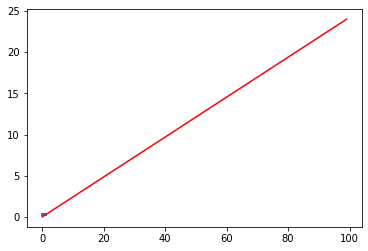

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize=2)
plt.plot(predicted, 'r')

plt.show()

In [87]:

# 주입변수 변경
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0,1.0)) # 균등분포 -1~ 1 사이로
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y_model = W * x + b # 예측값

loss = tf.reduce_mean(tf.square(y_model - y))
optimazer = tf.train.GradientDescentOptimizer(0.5) 
train = optimazer.minimize(loss)

init = tf.global_variables_initializer() # 꼭초기화시켜서 sess해줘야함 1.4버전에서는~
sess.run(init)

for step in range(201):
    sess.run(train, {x:x_data, y:y_data})
    if step % 20 == 0: # 20번 마다 실행~
        print(step, sess.run(W), sess.run(b)) # 기울기/ 바이어스 출력 결국 0.1 + 0.3 을 출력함

0 [0.3910543] [0.20019397]
20 [0.17086317] [0.26493084]
40 [0.11836243] [0.29091272]
60 [0.10475819] [0.29764527]
80 [0.10123299] [0.29938984]
100 [0.10031951] [0.29984188]
120 [0.1000828] [0.29995903]
140 [0.10002146] [0.2999894]
160 [0.10000556] [0.29999727]
180 [0.10000142] [0.2999993]
200 [0.10000038] [0.29999983]


In [79]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [80]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)

m = tf.constant(3.)
prod = tf.multiply(x_data,y_data)

for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data:x_val,
                                   y_data:y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [88]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/',sess.graph)

In [ ]:
# 이거한다음에
# anaconda 프롬프트에서
# tensorboard --logdir=/tmp
# 서버열어서 키는거

In [91]:
import numpy as np
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [100]:
train_X

array([ 3.3  ,  4.4  ,  5.5  ,  6.71 ,  6.93 ,  4.168,  9.779,  6.182,
        7.59 ,  2.167,  7.042, 10.791,  5.313,  7.997,  5.654,  9.27 ,
        3.1  ])

In [93]:
rng = np.random

learning_rate = 0.01
training_epochs = 4000
display_step = 50


In [104]:
# data point : 관측치
# 변수개수
n_samples = train_X.shape[0]
X = tf.placeholder("float") # 실제값
Y = tf.placeholder("float") # 실제값
W = tf.Variable(rng.randn(), name="weight") # 설명
b = tf.Variable(rng.randn(), name="bias") # activation 활성화
activation = tf.add(tf.multiply(X,W),b) # y = ax + b
# 미니배치 사이즈를 고려함
cost = tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples) # pow(,2) 2승
# 역전파 : optimizer 도 hyper parameter임
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # hyper parameter
# 기울기를 어떻게 찾아가느냐? momentum: 가던방향으로 데이터를 고려함
init = tf.initialize_all_variables()

Epoch: 0001 cost= 20.247396469 W= -0.37591952 b= -1.4713278
Epoch: 0051 cost= 0.327848822 W= 0.52953386 b= -1.2124035
Epoch: 0101 cost= 0.298873872 W= 0.5128847 b= -1.0926312
Epoch: 0151 cost= 0.273244113 W= 0.4972257 b= -0.97998124
Epoch: 0201 cost= 0.250573486 W= 0.48249793 b= -0.87403065
Epoch: 0251 cost= 0.230520368 W= 0.46864593 b= -0.77438045
Epoch: 0301 cost= 0.212782979 W= 0.45561787 b= -0.6806576
Epoch: 0351 cost= 0.197093591 W= 0.4433646 b= -0.5925081
Epoch: 0401 cost= 0.183216155 W= 0.43184015 b= -0.5096022
Epoch: 0451 cost= 0.170941204 W= 0.42100108 b= -0.43162668
Epoch: 0501 cost= 0.160083830 W= 0.41080666 b= -0.35828856
Epoch: 0551 cost= 0.150480360 W= 0.40121844 b= -0.2893119
Epoch: 0601 cost= 0.141986132 W= 0.3922007 b= -0.22443856
Epoch: 0651 cost= 0.134472996 W= 0.38371915 b= -0.16342317
Epoch: 0701 cost= 0.127827644 W= 0.37574205 b= -0.10603657
Epoch: 0751 cost= 0.121949926 W= 0.36823946 b= -0.052063074
Epoch: 0801 cost= 0.116751187 W= 0.36118296 b= -0.0012996426
Epo

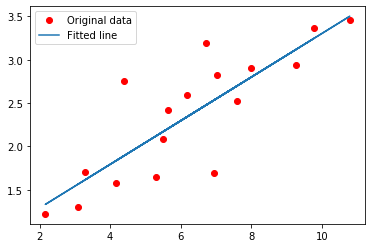

In [98]:
# 그라프 정의 : node (연산) + edge(데이터 전달 : tensor(배열+행렬))

# 전제조건 : GPU가 존재 -> 네트워크로 연결
# session이 있으면 실행한다고 보면됨.
with tf.Session() as sess: # 실행부
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
            # 어큐러시는 증가
        if epoch % display_step == 0: # 비용함수 : 감소 :우하향
            print("Epoch:", '%04d' % (epoch+1), "cost=",
                 "{:.9f}".format(sess.run(cost, feed_dict={X:train_X,Y:train_Y})),
                 "W=", sess.run(W), "b=", sess.run(b)) # 수렴값
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X,Y:train_Y}),
         "W=", sess.run(W), "b=", sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    # predict(예측값) 한 값을 출력
    plt.plot(train_X,sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [106]:
# tensor는 직접 시각화하는것이 불가능함 -> sess를 사용해서 numpy 포맷으로 변경
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [109]:
my_distribution = tf.random_uniform((600,400), seed=42) # 24
uniform = run_variable(my_distribution)

<function matplotlib.pyplot.show(*args, **kw)>

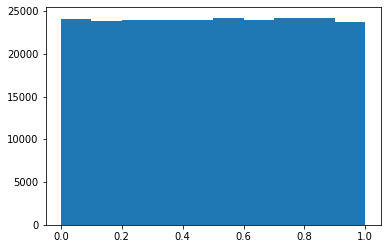

In [110]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 데이터 메모리 저장 : 1차원 # 평탄화 작업
plt.show

In [ ]:
# activation 함수 : 활성화 함수 : 회귀냐 분류인가를 결정
- 비선형 매핑을 해줌 ( 선형대수를 -> 비선형문제로 변경)
- 가중치를 깊게하고 활성화함수 매핑으로 XOR문제를 해결

In [113]:
# 텐서플로는 한번 실행한 함수는 다시 사용못함.

from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

x_vals = np.linspace(-10., 10.,100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[4.53988992e-05 5.55621925e-05 6.80006294e-05 8.32234827e-05
 1.01854002e-04 1.24654915e-04 1.52559623e-04 1.86710374e-04
 2.28504961e-04 2.79653838e-04 3.42249995e-04 4.18854392e-04
 5.12600439e-04 6.27321712e-04 7.67708042e-04 9.39496227e-04
 1.14970295e-03 1.40690911e-03 1.72160671e-03 2.10662180e-03
 2.57762963e-03 3.15378152e-03 3.85846667e-03 4.72023638e-03
 5.77392318e-03 7.06199264e-03 8.63617122e-03 1.05593993e-02
 1.29081631e-02 1.57752639e-02 1.92730804e-02 2.35373794e-02
 2.87317129e-02 3.50524161e-02 4.27341757e-02 5.20560700e-02
 6.33478781e-02 7.69963170e-02 9.34506760e-02 1.13227094e-01
 1.36910472e-01 1.65152775e-01 1.98666320e-01 2.38210660e-01
 2.84571982e-01 3.38534624e-01 4.00845440e-01 4.72173209e-01
 5.53066799e-01 6.43916968e-01 7.44927069e-01 8.56097102e-01
 9.77223714e-01 1.10791615e+00 1.24762553e+00 1.39

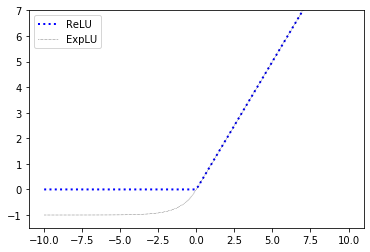

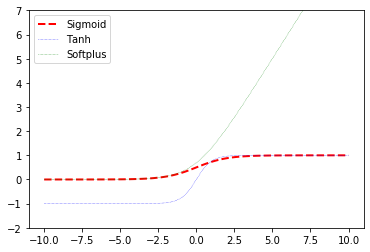

In [119]:
print(sess.run(tf.nn.relu([-3.,3.,10.]))) # 0 ~ 00
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1.,0.,1.]))) # 0 ~ 1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1.,0.,1.]))) # -1 ~ 1
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.elu([-1.,0.,1.]))) # -1 ~ 00 수정본
y_elu = sess.run(tf.nn.elu(x_vals))
print(sess.run(tf.nn.softplus([-1.,0.,1.]))) # 각진 단점 보완 elu 에서
y_softplus = sess.run(tf.nn.softplus(x_vals))
print(y_softplus)
print(y_elu)
plt.plot(x_vals, y_relu, 'b:', label="ReLU", linewidth=2)
plt.plot(x_vals, y_elu, 'k:', label="ExpLU", linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()
plt.plot(x_vals, y_sigmoid, 'r--', label="Sigmoid", linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label="Tanh", linewidth=0.5)
plt.plot(x_vals, y_softplus, 'g:', label="Softplus", linewidth=0.5)
plt.ylim([-2,7])
plt.legend(loc='upper left')
plt.show()

In [134]:
# 오늘의 정리

ops.reset_default_graph() # 그라프 초기화
sess = tf.Session()
tf.set_random_seed(5) # 시드의 초기값 tensorflow
np.random.seed(42) # numpy
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500)
# 사이즈를 fix 하지 않고 입력 데이터로 부터 계산
# 행데이터로 생성
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)

In [135]:
# y = ax + b  / 0~1 사이 값으로 mapping / sigmoid
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# ReLU 0 ~ oo 무한대
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

# 0.75로 수렴과정
# MSE
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid AND ReLU 함수의 최적화 0.75')


 Sigmoid AND ReLU 함수의 최적화 0.75


In [136]:
loss_vec_sigmoid = [] # 로스값을 지정
loss_vec_relu = []

In [137]:
for i in range(500):
    rand_indices = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_indices]]) # 모양을 맞추기 위해서
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output))+'\n'+ 'relu = ' + str(np.mean(relu_output)) + '\n')

sigmoid = 0.12655206
relu = 2.0227606

sigmoid = 0.17863758
relu = 0.7530296

sigmoid = 0.24769813
relu = 0.7492897

sigmoid = 0.3446748
relu = 0.7499546

sigmoid = 0.4400661
relu = 0.7539999

sigmoid = 0.5236898
relu = 0.754772

sigmoid = 0.58373857
relu = 0.7508698

sigmoid = 0.62733483
relu = 0.7470234

sigmoid = 0.6549499
relu = 0.75180537

sigmoid = 0.67452586
relu = 0.75470716



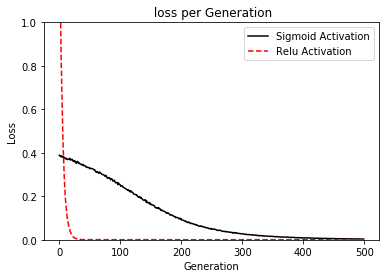

In [138]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')


plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 

In [ ]:
# 오늘 정리
미니배치를 하는이유

엑티베이션 : 선형을 비선형으로 바꿔서 회귀와 분류를 구분
            :예측과 분류를 나누고
        
accuracy를 이용해서 경사하강법을 하지 못하고 function : accuracy는 미분이 안되고 0~1로 되ㅐ어서
    
    회귀일땐 MSE
    분류 :Auto
        
    경사하강법이 해결하는 문제 : 러닝레이트, 기울기
        
graph를 만들고 세션으로 실행
그라프는 실행되지 않고 세선으로 꼭지점에서 실행